# financial analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#change dir to your project folder
%cd /content/drive/My Drive/Colab Notebooks/finance/  
!ls

https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

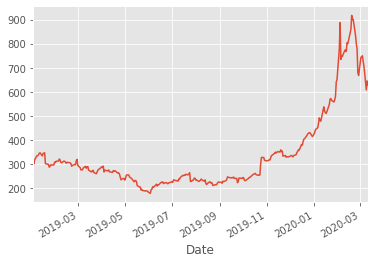

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2019, 1, 1)
end = dt.datetime.now()
df = web.DataReader('TSLA', 'yahoo', start, end)
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
df['Adj Close'].plot()
plt.show()

# save to file
df.to_csv('TSLA.csv')
df = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)


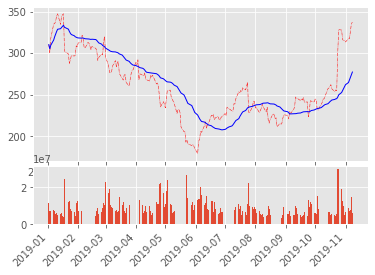

In [ ]:
# look at smooth moving average: current price add prices from the past k-1 days, divide by k
#df['5MoveAverage'] = df['Adj Close'].rolling(window=5).mean()
# get rid of Nan
df['30MoveAverage'] = df['Adj Close'].rolling(window=30,min_periods=0).mean()

# create two subplots
ax1 = plt.subplot2grid((7,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((7,1), (5,0), rowspan=2, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'], color='red', linestyle='-.', linewidth=0.5)
ax1.plot(df.index, df['30MoveAverage'], color='blue', linewidth=1)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax2.bar(df.index, df['Volume'])


plt.show()

# candlestick  plot

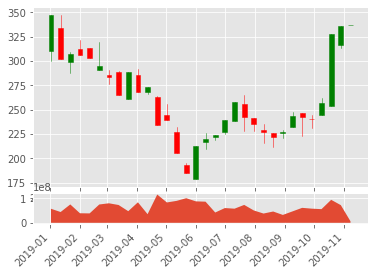

In [ ]:
#!pip3 install https://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

# Save graph to file.
#plt.savefig('mpl_finance-tesla.png')

Obtain S&P 500 list

In [ ]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers
    
save_sp500_tickers()    